##### Experiment 1

Model Size: 417MB

Original Repo： Hugging Face.

Framework: PyTorch.

NLP Task: Text Classification

Host Config:

```
runtime: python38
service: sentbert

instance_class: F4_1G

automatic_scaling:
  target_cpu_utilization: 0.65
  max_instances: 1

entrypoint: gunicorn -b :$PORT -w 8 main:app --timeout 120
```

In [1]:
gae_sentbert = 'https://sentbert-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot'
data_sentbert = {
    "sentence": "I am not unhappy about the service you provided.",
    "labels": "happy,unhappy,neutral"
  }
import subprocess
import json
import requests

In [4]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_sentbert, 
                         headers=headers, 
                         json=data_sentbert)
print(response.text)


<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>



We saw the memory limit issue:

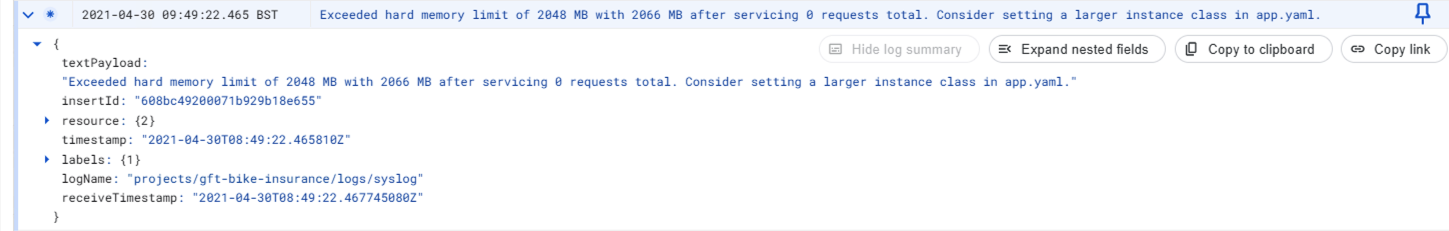

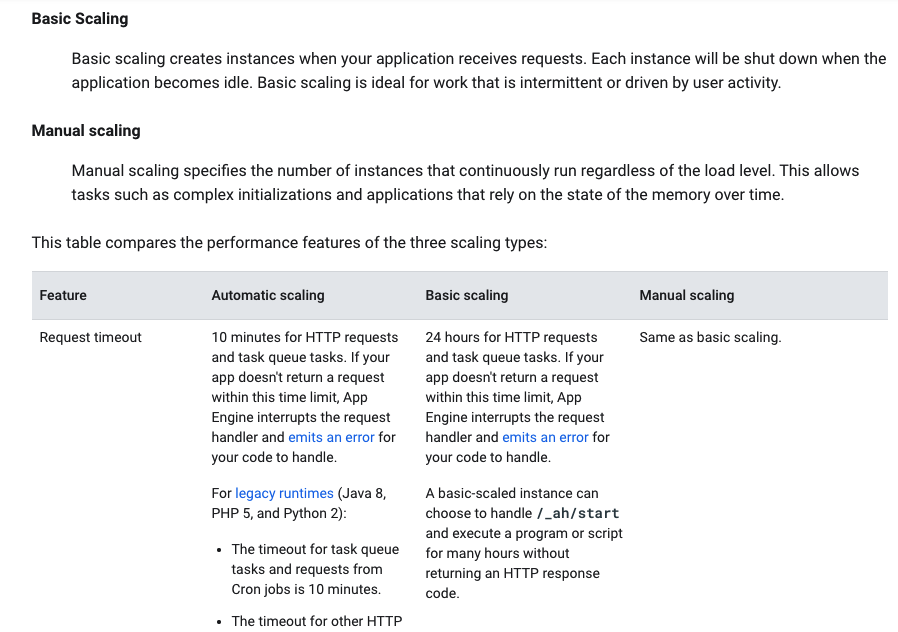

In [7]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(5):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_sentbert, 
                                 headers=headers, 
                                 json=data_sentbert)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(10)
    
print("the average time for making an API call is ", tot_pred_time/5)

Epoch:  0

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

the time for making the API call is  0:00:22.282154
Epoch:  1

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

the time for making the API call is  0:00:20.655141
Epoch:  2

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an er

In [8]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:20.655141
0:00:21.259442
0:00:22.282154


### Experiment 2

1 instance

Host Config:

```
runtime: python
env: flex
entrypoint: gunicorn -b :$PORT main:app
service: sentbert

runtime_config:
  python_version: 3

# This sample incurs costs to run on the App Engine flexible environment.
# The settings below are to reduce costs during testing and are not appropriate
# for production use. For more information, see:
# https://cloud.google.com/appengine/docs/flexible/python/configuring-your-app-with-app-yaml
manual_scaling:
  instances: 1
resources:
  cpu: 1
  memory_gb: 2
  disk_size_gb: 20

liveness_check:
  initial_delay_sec: 300
  check_interval_sec: 300
  timeout_sec: 4
  failure_threshold: 4
  success_threshold: 2
readiness_check:
  check_interval_sec: 300
  timeout_sec: 4
  failure_threshold: 2
  success_threshold: 2
  app_start_timeout_sec: 1800
```

In [9]:
gae_sentbert = 'https://sentbert-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot'
data_sentbert = {
    "sentence": "I am not unhappy about the service you provided.",
    "labels": "happy,unhappy,neutral"
  }

In [10]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_sentbert, 
                         headers=headers, 
                         json=data_sentbert)
print(response.text)

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07



In [13]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_sentbert, 
                                 headers=headers, 
                                 json=data_sentbert)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:05.667031
Epoch:  1
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:08.655676
Epoch:  2
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:05.856127
Epoch:  3
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:06.527592
Epoch:  4
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:10.966620
Epoch:  5
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:14.006297
Epoch:  6
<html>
<head><title>502 Bad Gateway</title></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr><center>nginx</center>
</body>
</h

In [15]:
# Latency
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:04.393599
0:00:09.803953
0:00:24.519261


In [16]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_sentbert, 
                                     headers=headers, 
                                     json=data_sentbert)
        print(response.text)
        num += 1
    return num

In [18]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

<html>
<head><title>502 Bad Gateway</title></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr><center>nginx</center>
</body>
</html>

num_threads is: 1; tot number of requests processed in 20s are 3
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

num_threads is: 2; tot number of requests processed in 20s are 2
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 s

### Experiment 3

3 instances

Host Config:

```
...

manual_scaling:
  instances: 3
resources:
  cpu: 1
  memory_gb: 2
  disk_size_gb: 20

....
```

In [22]:
gae_sentbert = 'https://sentbert-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot'
data_sentbert = {
    "sentence": "I am not unhappy about the service you provided.",
    "labels": "happy,unhappy,neutral"
  }

In [23]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_sentbert, 
                         headers=headers, 
                         json=data_sentbert)
print(response.text)

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07



In [24]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_sentbert, 
                                 headers=headers, 
                                 json=data_sentbert)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:12.026698
Epoch:  1
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:07.977237
Epoch:  2
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:09.626399
Epoch:  3
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:08.308737
Epoch:  4
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:08.987400
Epoch:  5
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:07.847815
Epoch:  6
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

the time for making the API call is  0:00:08.584841
Epoch:

KeyboardInterrupt: 

In [26]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_sentbert, 
                             headers=headers, 
                             json=data_sentbert)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
happy 	 similarity: 0.7
neutral 	 similarity: -0.26
unhappy 	 similarity: -0.37

the time for making the API call is  0:00:19.688789
Epoch:  1
happy 	 similarity: 0.7
neutral 	 similarity: -0.26
unhappy 	 similarity: -0.37

the time for making the API call is  0:00:04.119564
Epoch:  2
happy 	 similarity: 0.7
neutral 	 similarity: -0.26
unhappy 	 similarity: -0.37

the time for making the API call is  0:00:03.700067
Epoch:  3

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

the time for making the API call is  0:00:06.725635
Epoch:  4
happy 	 similarity: 0.7
neutral 	 similarity: -0.26
unhappy 	 similarity: -0.37

the time for making the API call is  0:00:19.384260
Epoch:  5
happy 	 similarity: 0.7
neutral 

In [26]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:05.426101
0:00:09.108852
0:00:16.706320


In [2]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_sentbert, 
                                 headers=headers, 
                                 json=data_sentbert)
        print(response.text)
        num += 1
    return num

In [3]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
<html>
<head><title>502 Bad Gateway</title></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr><center>nginx</center>
</body>
</html>

num_threads is: 1; tot number of requests processed in 20s are 1
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

num_threads is: 2; tot number of requests processed in 20s are 4
happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

happy 	 similarity: 0.65
neutral 	 similarity: 0.35
unhappy 	 similarity: 0.07

<html>
<head><title>502 Bad Gateway<

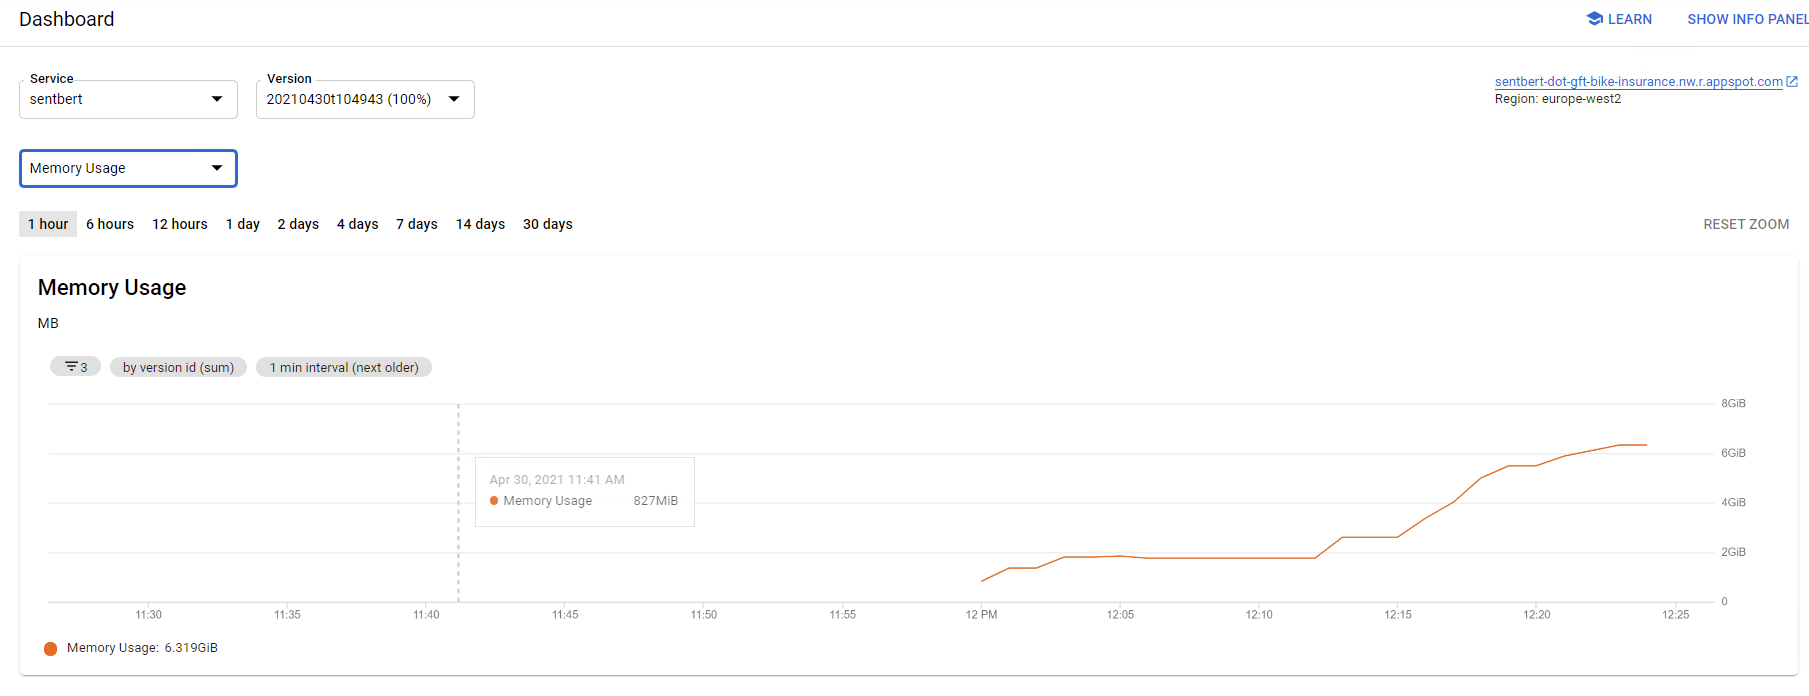